# Clustering

Clustering is an unsupervised machine learning technique where we partition a set of data points into groups or clusters.
This implies that we need to have some sort of metric that allows us to decide which elements are "closer together" than others.
Essentially, this allows us to define cluster such that all elements within a cluster are closer together (as determined by this metric) compared to elements outside this cluster. In many cases, the Eucledean distance is used, although other metrics such as the Manhattan distance are favoured.

There are a number of different clustering algorithms and we will look at a few of them.
To explore the behaviour of these algorithms, we will make use of some artificial ("toy") datasets, in particular:
- blobs: This creates a number of "blobs" with scattered points. We can vary the overlap between these blobs which will make it harder for the clustering algorithm to decide which point belongs to which cluster 
- moons: Here we generate intertwined half-moons. Although these sets of data are well separated from each other, we will see that not all clustering algorithms can cope with this arrangement.
- circles: Similar to the half-moons, this function allows to generate two concentric circles of data points. These are well separated from each other (depending on the settings), but because they all go around a common origin, not all clustering algorithms can disentangle them.

In [1]:
# Imports

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import pandas as pd 

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans, DBSCAN

## Generate Data

First, we need to generate some artificial data. In this example, we generate "blobs" and "moons" - feel free to try the "circles" as well.

### Blobs
We create 3 blobs (```centers=3```) that overlap only a little (```cluster_std=0.7```). Feel free to explore this, e.g. by choosing more clusters or more overlapping clusters. 
For simplicity, and because we want to compare this data to the half-moon or circles, we limit ourselves to the 2-dimensional case (```n_features=2```).

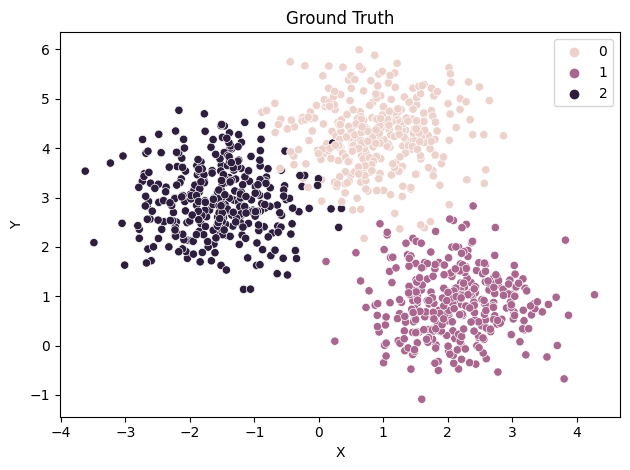

In [11]:
X_blob, y_blob_true = make_blobs(n_samples=1000, centers=3, n_features=2,  
                           cluster_std=0.70, random_state=0)

# X_blob is a 2-dimensional array (for the two features we have generated)
# here we split it into the x, y coordinates into separate arrays.
# In a real application, this would be our "data"
#
# y_blob_true are the true labels generated for each data point
x_blob_data=X_blob[0:,0]
y_blob_data=X_blob[0:,1]

sns.scatterplot(x=x_blob_data,y=y_blob_data, hue=y_blob_true)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')
plt.tight_layout()
plt.show()

### Half-Moons

Here we do the same for the half-moons. The parameter ````noise``` controls how far the moons spead out.



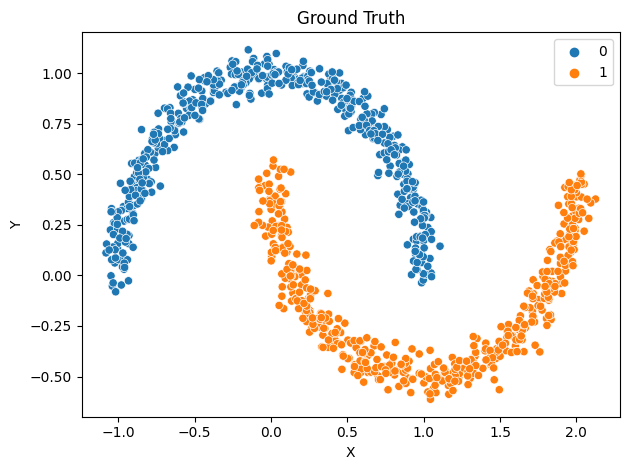

In [12]:
X_moon, y_moon_true = make_moons(n_samples=1000, noise=0.05)

x_moon_data=X_moon[0:,0]
y_moon_data=X_moon[0:,1]
sns.scatterplot(x=x_moon_data,y=y_moon_data, hue=y_moon_true)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')
plt.tight_layout()
plt.show()

### Circles

Now we create the data for two concentric circles.
The parameter ```noise``` controls how wide the circles are by adding random Gaussian noise to each data point, the parameter ```factor``` is a scale factor between the inner and outer circle. 
Feel free to explore the effect of these parameters.

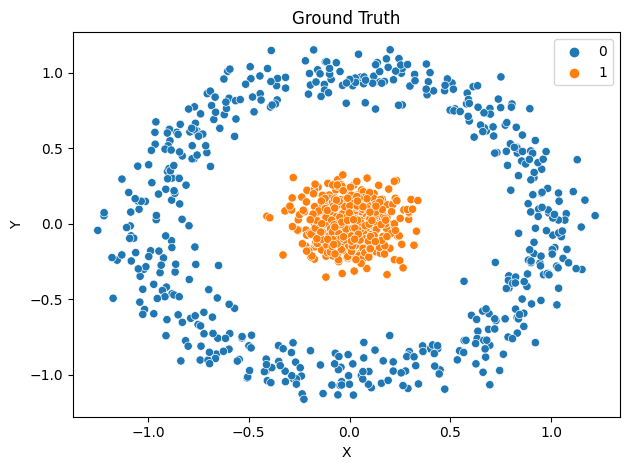

In [13]:
X_circle, y_circle_true = make_circles(n_samples=1000, factor=.1, noise=.1)

x_circle_data=X_circle[0:,0]
y_circle_data=X_circle[0:,1]
sns.scatterplot(x=x_circle_data,y=y_circle_data, hue=y_circle_true)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')
plt.tight_layout()
plt.show()

## Clustring algorithms

In the following, we explore the behaviour of the various clustering algorithms.

### KMeans
We first investigate the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm.
Here we need to specify the number of clusters we want to find as a hyperparameter.

The general approach in scikit-learn is the following

- create an instance of the algorithm and specify the relevant hyperparameters
- call the ```fit(training_data)``` method to train the algorithm
- call the ```predict(test_data)``` method to obtain the predictions for new data

Normally, we would _always_ use independent datasets for training and testing (e.g. we could use [test_train_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)), here we want to demonstrate that even in the unrealistic case that the algorithm is trained on the same data it is applied on (i.e. there are no "surprises" in the data), some algorithms still cannot distinguish between some of the datasets as they are intrinsically not able to do so.


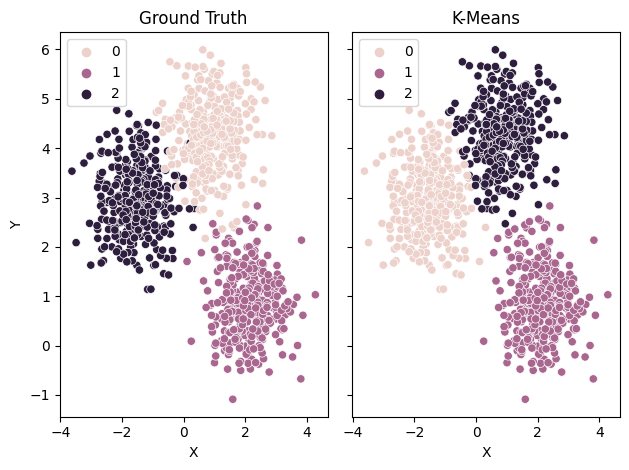

In [17]:
# we start with 3 clusters - this is our "external expert" knowledge, as we know that we have generated 3 "blobs"
# observe what happens if you specify more or fewer clusters.

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_blob)

# now create predictions on the same training data
y_kmeans_blob = kmeans.predict(X_blob)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# left side - original data
plt.subplot(121)
sns.scatterplot(x=x_blob_data,y=y_blob_data, hue=y_blob_true, ax=ax1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')


# right side - predicted clusters
plt.subplot(122)
sns.scatterplot(x=x_blob_data,y=y_blob_data, hue=y_kmeans_blob,ax=ax2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means')
plt.tight_layout()
plt.show()

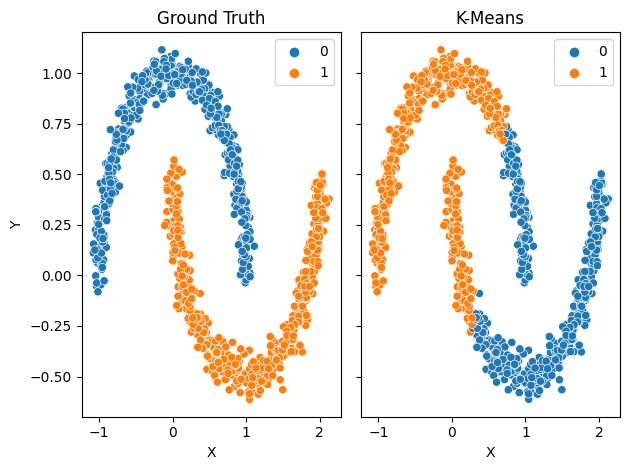

In [19]:
# now do the same for the half-moons 
# Observe what the clustering algorithm produces as output in either case.

kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X_moon)
y_kmeans_moon = kmeans.predict(X_moon)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# left side - original data
plt.subplot(121)
sns.scatterplot(x=x_moon_data,y=y_moon_data, hue=y_moon_true, ax=ax1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')


# right side - predicted clusters
plt.subplot(122)
sns.scatterplot(x=x_moon_data,y=y_moon_data, hue=y_kmeans_moon,ax=ax2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means')
plt.tight_layout()
plt.show()

In [ ]:
###
### now do the same for the circles and observe the output
###

### DBScan

The [DBScan](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) algorithm (Density-Based Spatial Clustering of Applications with Noise) is designed to find clusters in data with noise.
Unlike KMeans, it does not require that we know the number of clusters beforehand, however, it is controlled by the hyperparameter ```eps``` (and others).
This parameter controls the maximum distance when defining the neighbourhood of samples. The performance of the algorithm strongly depends on this parameter and needs to be carefully tuned to the problem at hand.

N.B.: the code used to plot the results of the DBSCan algorithm was taken from the scikit-learn [example](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py).

First for the blobs:

In [25]:
def show_dbscan(data, classifier):
    labels = classifier.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = data[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f"DBSCAN: Estimated number of clusters: {n_clusters_}")
    plt.tight_layout()
    plt.show()

Estimated number of clusters: 6
Estimated number of noise points: 89


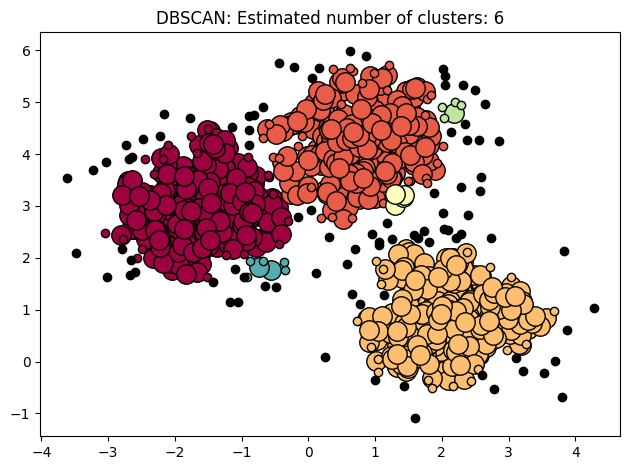

In [26]:
db = DBSCAN(eps=0.25)
db.fit(X_blob)

show_dbscan(X_blob, db)


In [ ]:
##
## vary the parameter eps and observe the output
##

... then for the half-moons ...

Estimated number of clusters: 2
Estimated number of noise points: 0


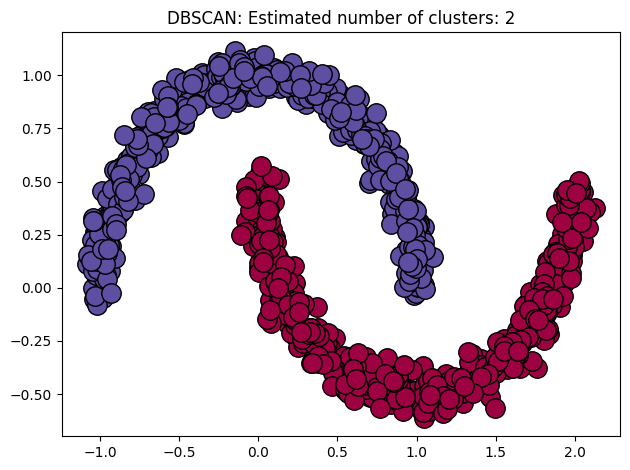

In [27]:
db = DBSCAN(eps=0.25)
db.fit(X_moon)

show_dbscan(X_moon, db)

... and the circles

Estimated number of clusters: 2
Estimated number of noise points: 0


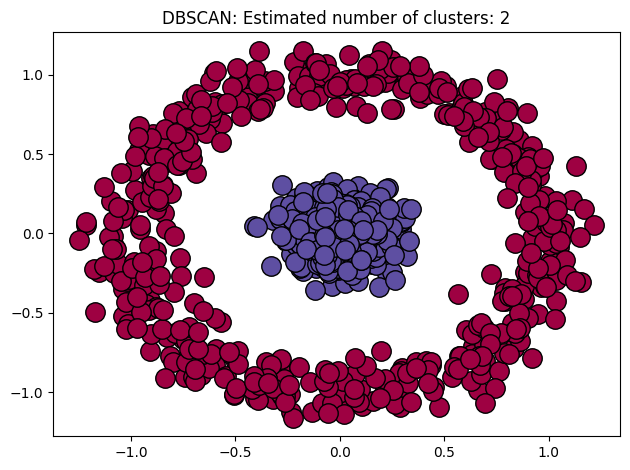

In [29]:
db = DBSCAN(eps=0.25)
db.fit(X_circle)

show_dbscan(X_circle, db)

### Gaussian Mixture Models

Finally, we look at [Gaussian mixture models](https://scikit-learn.org/stable/modules/mixture.html).
This algorithm - similar to KMeans - requires that we set the number of clusters we want to find using out external expert knowledge.

Note how we can combine creating the instance of the model (```GMM```) and fitting in one step if we so wish

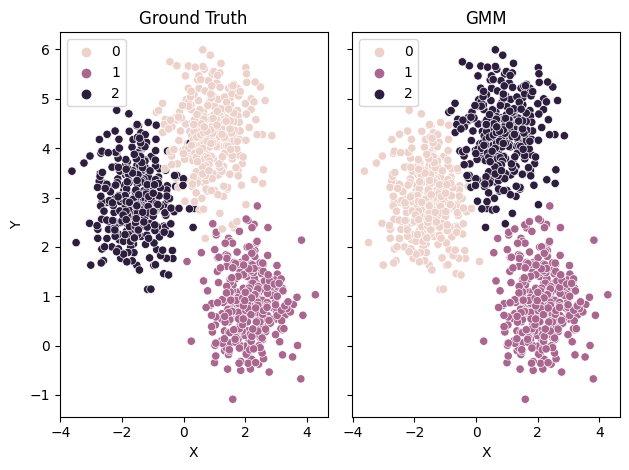

In [37]:
gmm = GMM(n_components=3).fit(X_blob)
y_gmm_blob = gmm.predict(X_blob)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# left side - original data
plt.subplot(121)
sns.scatterplot(x=x_blob_data,y=y_blob_data, hue=y_blob_true, ax=ax1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')


# right side - predicted clusters
plt.subplot(122)
sns.scatterplot(x=x_blob_data,y=y_blob_data, hue=y_gmm_blob,ax=ax2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GMM')
plt.tight_layout()
plt.show()



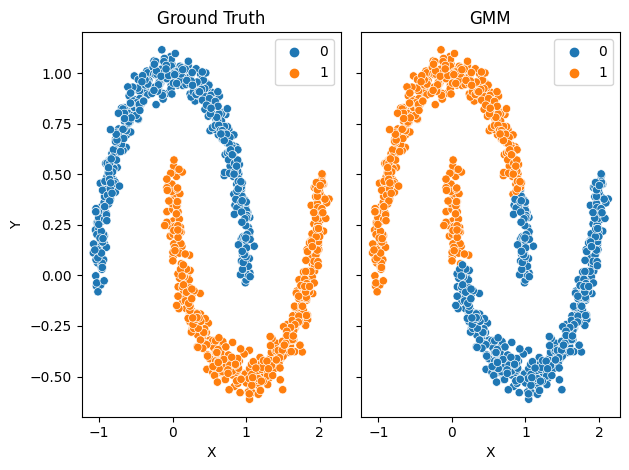

In [38]:
gmm = GMM(n_components=2).fit(X_moon)
y_gmm_moon = gmm.predict(X_moon)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# left side - original data
plt.subplot(121)
sns.scatterplot(x=x_moon_data,y=y_moon_data, hue=y_moon_true, ax=ax1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')


# right side - predicted clusters
plt.subplot(122)
sns.scatterplot(x=x_moon_data,y=y_moon_data, hue=y_gmm_moon,ax=ax2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GMM')
plt.tight_layout()
plt.show()


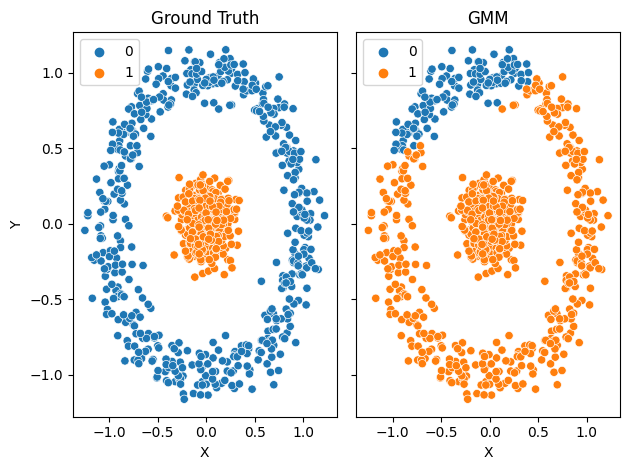

In [39]:
gmm = GMM(n_components=2).fit(X_circle)
y_gmm_circle = gmm.predict(X_circle)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# left side - original data
plt.subplot(121)
sns.scatterplot(x=x_circle_data,y=y_circle_data, hue=y_circle_true, ax=ax1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')


# right side - predicted clusters
plt.subplot(122)
sns.scatterplot(x=x_circle_data,y=y_circle_data, hue=y_gmm_circle,ax=ax2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GMM')
plt.tight_layout()
plt.show()

We can also compare how KMeans and the Gaussian mixture models differ in their assignments of the cluster.
(note that depending on the data generated, it appears that the clusters are often swapped between the two approaches).
Generally we observe that the differences are typically quite minor.

Text(0.5, 1.0, 'Difference KMeans / GMM')

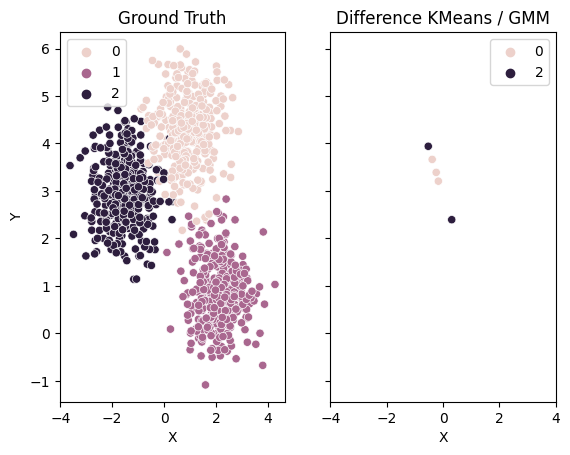

In [70]:
X_blob, y_blob_true = make_blobs(n_samples=1000, centers=3, n_features=2,  
                           cluster_std=0.70, random_state=0)

kmeans = KMeans(n_clusters=3, n_init='auto').fit(X_blob)
y_kmeans_blob = kmeans.predict(X_blob)

gmm = GMM(n_components=3).fit(X_blob)
y_gmm_blob = gmm.predict(X_blob)

X_blob_2 = []
y_true = []
for i in range(len(X_blob)):
    if y_kmeans_blob[i] != y_gmm_blob[i]:
        X_blob_2.append(X_blob[i])
        y_true.append(y_blob_true[i])


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# left side - original data
plt.subplot(121)
sns.scatterplot(x=x_blob_data,y=y_blob_data, hue=y_blob_true, ax=ax1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')

X_blob_2 = np.asarray(X_blob_2)
plt.subplot(122)
sns.scatterplot(x=X_blob_2[0:,0],y=X_blob_2[0:,1], hue=y_true,ax=ax2)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-4.0, 4.0)
plt.title('Difference KMeans / GMM')